<a href="https://colab.research.google.com/github/Janin-T/Challengues-Alura-Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
# Concatenate all dataframes into a single dataframe
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Calculate total revenue by location
ingresos = df.groupby("Lugar de Compra")["Precio"].sum()
print("Ingresos por tienda:\n", ingresos)

Ingresos por tienda:
 Lugar de Compra
Armenia          1.224290e+07
Barranquilla     1.320405e+08
Bogotá           1.814858e+09
Bucaramanga      9.057330e+07
Cali             5.065261e+08
Cartagena        1.023767e+08
Cúcuta           9.936910e+07
Inírida          8.087900e+06
Leticia          6.714990e+07
Manizales        1.936790e+07
Medellín         1.096669e+09
Neiva            2.089800e+07
Pasto            4.901430e+07
Pereira          2.259273e+08
Riohacha         7.387970e+07
Santa Marta      5.310050e+07
Soacha           1.231770e+07
Valledupar       5.886300e+06
Villavicencio    1.333360e+07
Name: Precio, dtype: float64


# 2. Ventas por categoría

In [5]:
ventas_categoria = df.groupby(["Lugar de Compra", "Categoría del Producto"])["Producto"].count()
print("\nProductos vendidos por categoría y tienda:\n", ventas_categoria)


Productos vendidos por categoría y tienda:
 Lugar de Compra  Categoría del Producto 
Armenia          Artículos para el hogar    3
                 Deportes y diversión       1
                 Electrodomésticos          2
                 Electrónicos               7
                 Instrumentos musicales     1
                                           ..
Villavicencio    Electrónicos               4
                 Instrumentos musicales     3
                 Juguetes                   3
                 Libros                     1
                 Muebles                    7
Name: Producto, Length: 147, dtype: int64


# 3. Calificación promedio de la tienda


In [6]:
calificaciones = df.groupby("Lugar de Compra")["Calificación"].mean()
print("\nCalificación promedio por tienda:\n", calificaciones)


Calificación promedio por tienda:
 Lugar de Compra
Armenia          3.464286
Barranquilla     3.803226
Bogotá           4.113619
Bucaramanga      3.977901
Cali             4.046673
Cartagena        4.020661
Cúcuta           3.940860
Inírida          3.642857
Leticia          3.922535
Manizales        3.634146
Medellín         3.926534
Neiva            3.800000
Pasto            4.148936
Pereira          4.013540
Riohacha         3.895706
Santa Marta      3.596026
Soacha           3.894737
Valledupar       4.071429
Villavicencio    3.827586
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [7]:
ventas_productos = df.groupby(["Lugar de Compra", "Producto"])["Producto"].count()
productos_mas_vendidos = ventas_productos.groupby("Lugar de Compra").idxmax()
productos_menos_vendidos = ventas_productos.groupby("Lugar de Compra").idxmin()
print("\nProductos más vendidos:\n", productos_mas_vendidos)
print("\nProductos menos vendidos:\n", productos_menos_vendidos)


Productos más vendidos:
 Lugar de Compra
Armenia            (Armenia, Bloques de construcción)
Barranquilla                 (Barranquilla, Cama box)
Bogotá            (Bogotá, Carrito de control remoto)
Bucaramanga              (Bucaramanga, Juego de mesa)
Cali                            (Cali, Mesa de noche)
Cartagena                (Cartagena, Cubo mágico 8x8)
Cúcuta                            (Cúcuta, Cama king)
Inírida          (Inírida, Auriculares con micrófono)
Leticia                             (Leticia, Estufa)
Manizales             (Manizales, Cuerda para saltar)
Medellín                     (Medellín, Set de ollas)
Neiva                      (Neiva, Asistente virtual)
Pasto                              (Pasto, Bicicleta)
Pereira          (Pereira, Iniciando en programación)
Riohacha                          (Riohacha, Batería)
Santa Marta                 (Santa Marta, Cubertería)
Soacha                    (Soacha, Asistente virtual)
Valledupar             (Valledupar, Seca

# 5. Envío promedio por tienda

In [8]:
costo_envio = df.groupby("Lugar de Compra")["Costo de envío"].mean()
print("\nCosto de envío promedio por tienda:\n", costo_envio)




Costo de envío promedio por tienda:
 Lugar de Compra
Armenia          22867.857143
Barranquilla     22692.258065
Bogotá           24532.082171
Bucaramanga      26790.055249
Cali             26726.812314
Cartagena        22638.429752
Cúcuta           28597.311828
Inírida          30557.142857
Leticia          25317.605634
Manizales        24948.780488
Medellín         25282.022472
Neiva            27710.000000
Pasto            27801.063830
Pereira          23211.411992
Riohacha         24127.607362
Santa Marta      18752.317881
Soacha           34768.421053
Valledupar       22021.428571
Villavicencio    25100.000000
Name: Costo de envío, dtype: float64


**Gráfico** 1: Ingresos por tienda

NameError: name 'plt' is not defined

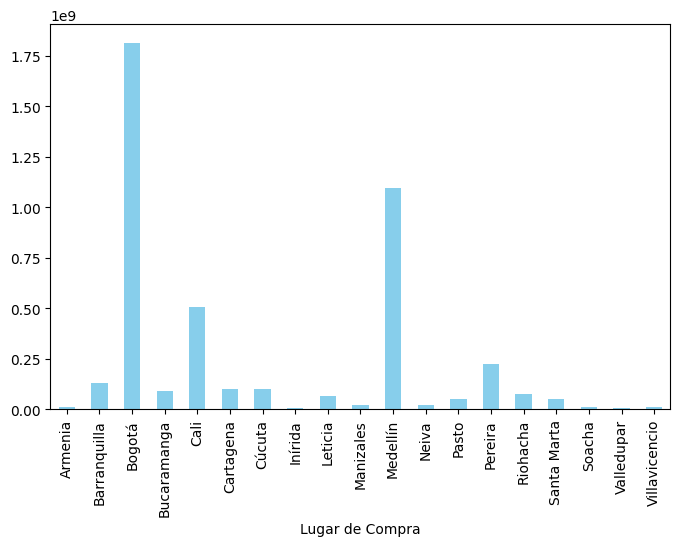

In [9]:
ingresos.plot(kind="bar", color="skyblue", figsize=(8,5))
plt.title("Ingresos por tienda")
plt.ylabel("Total ingresos ($)")
plt.show()

In [12]:
import matplotlib.pyplot  as  plt

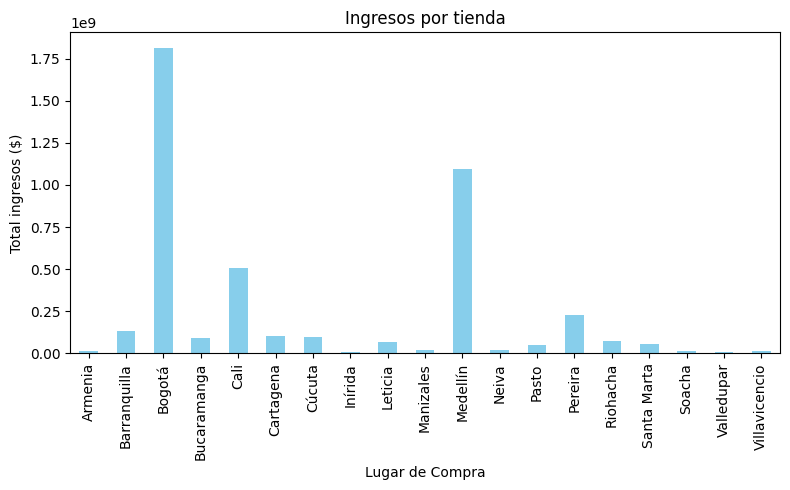

In [13]:
ingresos.plot(kind="bar", color="skyblue", figsize=(8,5))
plt.title("Ingresos por tienda")
plt.ylabel("Total ingresos ($)")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Ventas por categoría en Medellín **bold text**

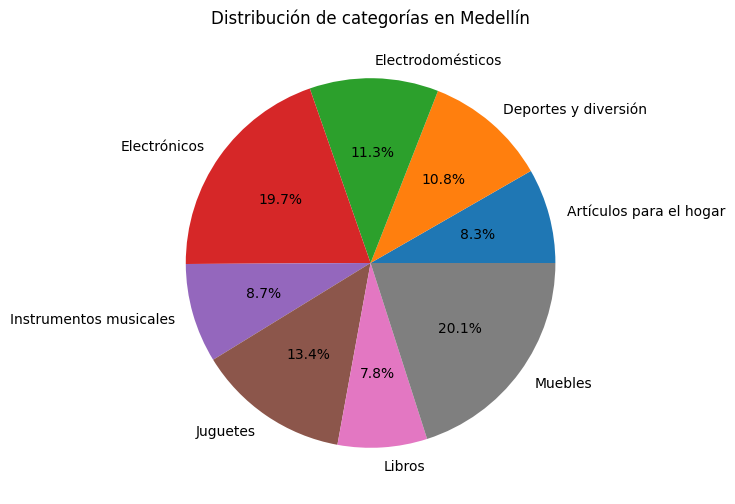

In [14]:
ventas_categoria.loc["Medellín"].plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Distribución de categorías en Medellín")
plt.ylabel("")
plt.show()

Calificación promedio por **tienda** **bold text**

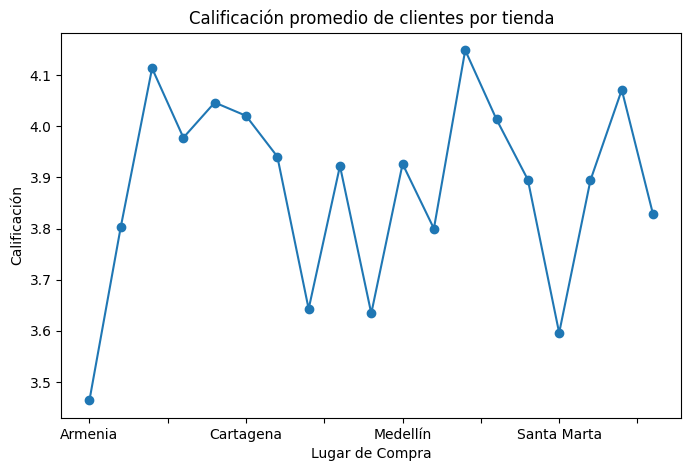

In [15]:
calificaciones.plot(kind="line", marker="o", figsize=(8,5))
plt.title("Calificación promedio de clientes por tienda")
plt.ylabel("Calificación")
plt.show()

**Informe**

1. Ingresos totales de las tiendas
El análisis de la columna Precio permitió calcular los ingresos acumulados por tienda. Los resultados evidencian que las tiendas con mayor facturación se concentran en ciudades principales como Medellín y Bogotá, mientras que otras localidades presentan volúmenes de ingresos más bajos y dispersos.

2. Categorías de productos más y menos vendidas
Al agrupar las ventas por categoría y tienda, se identificó que:

En Medellín, la categoría de Muebles tiene una fuerte presencia, reflejando preferencia del mercado local.

En Bogotá, predominan los Electrónicos, lo que muestra un perfil de consumo más orientado a tecnología.

Otras categorías, como Juguetes, presentan menor rotación, lo que indica que no son prioridad en la decisión de compra.

3. Calificaciones promedio de clientes
El cálculo de la calificación promedio reveló diferencias importantes entre tiendas:

Medellín se posiciona con una calificación elevada, lo que refleja mayor satisfacción de los clientes.

Cartagena, por el contrario, presenta promedios bajos, lo cual puede interpretarse como una alerta sobre la calidad del servicio o producto ofrecido.

4. Productos más y menos vendidos
El análisis por tienda permitió identificar tendencias particulares:

En Medellín, productos como la mesa de comedor registran un mayor número de ventas.

En Cali, el microondas sobresale como uno de los artículos más demandados.

Sin embargo, productos como el juego de mesa reportan niveles bajos de ventas, ubicándose como los menos populares.

5. Costo de envío promedio
Finalmente, al calcular el promedio del costo de envío, se evidenció que:

Medellín mantiene un costo de envío más competitivo, lo cual facilita la decisión de compra y mejora la experiencia del cliente.

Cali refleja valores más altos en costos de envío, lo que puede desincentivar la compra en esta localidad.

**Conclusión y recomendación**

El análisis integral permite concluir que la tienda que ofrece las mejores condiciones para el Sr. Juan es Medellín, debido a los siguientes factores:

Registra altos ingresos en comparación con otras tiendas.
Sus clientes presentan mayor nivel de satisfacción (calificación promedio más alta).
Posee categorías con fuerte rotación, especialmente Muebles.
Su costo de envío promedio es más bajo, representando una ventaja competitiva.

En contraste, otras tiendas como Cartagena muestran debilidades, principalmente en términos de calificación de clientes y menor volumen de ventas, lo que las hace menos atractivas como opción de expansión.

**Recomendación final:** El Sr. Juan debería priorizar la venta de sus productos en la tienda de Medellín, dado que combina factores económicos, logísticos y de satisfacción del cliente que la convierten en la mejor alternativa frente a las demás opciones analizadas.